In [1]:
import sys

from hypergraph import ArxivHyperGraph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

# Set plot style
plt.style.use('seaborn')
sns.set_palette('husl')


/var/folders/xc/cs1w4h297bq7hkn9t9znvf480000gn/T/ipykernel_81578/634642475.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Load the hypergraph
graph = ArxivHyperGraph('arxiv-data/arxiv-metadata-small.json.gz')

print(f"Number of papers: {len(graph.edge_dict)}")
print(f"Number of authors: {len(graph.author_dict)}")
print(f"Adjacency matrix shape: {graph.A.shape}")

Loading from pickle file: arxiv-data/arxiv-metadata-small.pkl
Number of papers: 100000
Number of authors: 141096
Adjacency matrix shape: (100000, 141096)


In [3]:
# Calculate average number of authors per paper
authors_per_paper = graph.A.sum(axis=1).A1
print(f"\nAverage authors per paper: {authors_per_paper.mean():.2f}")
print(f"Min authors per paper: {authors_per_paper.min()}")
print(f"Max authors per paper: {authors_per_paper.max()}")

# Calculate average number of papers per author
papers_per_author = graph.A.sum(axis=0).A1
print(f"\nAverage papers per author: {papers_per_author.mean():.2f}")
print(f"Min papers per author: {papers_per_author.min()}")
print(f"Max papers per author: {papers_per_author.max()}")


Average authors per paper: 2.17
Min authors per paper: 0.0
Max authors per paper: 448.0

Average papers per author: 1.54
Min papers per author: 1.0
Max papers per author: 73.0


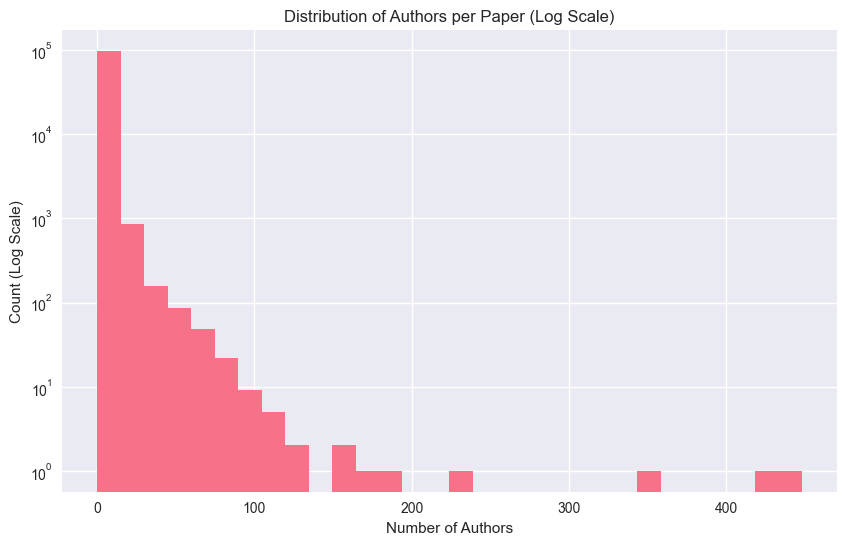

In [4]:
# Plot distribution of authors per paper with log scale
plt.figure(figsize=(10, 6))
plt.hist(authors_per_paper, bins=30)
plt.yscale('log')
plt.title('Distribution of Authors per Paper (Log Scale)')
plt.xlabel('Number of Authors')
plt.ylabel('Count (Log Scale)')
plt.show()

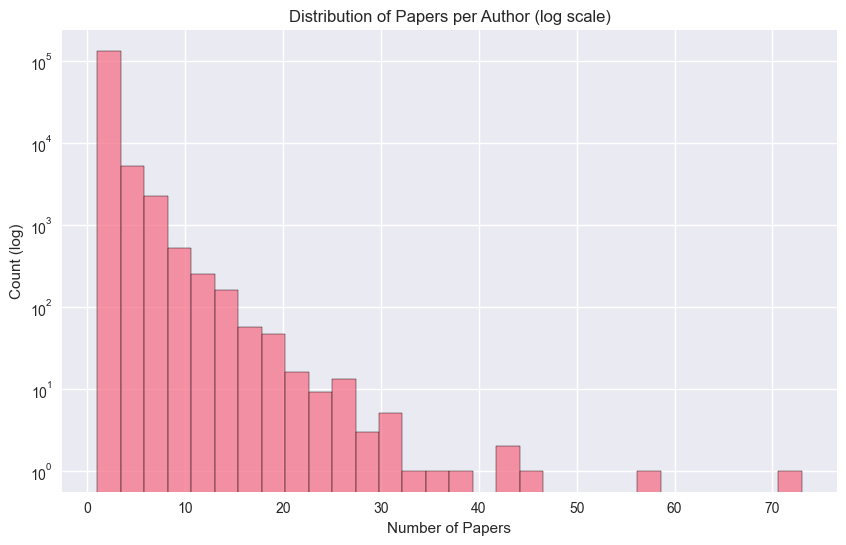

In [5]:
# Plot distribution of papers per author
plt.figure(figsize=(10, 6))
sns.histplot(papers_per_author, bins=30)
plt.title('Distribution of Papers per Author (log scale)')
plt.xlabel('Number of Papers')
plt.ylabel('Count (log)')
plt.yscale('log')
plt.show()

In [6]:
# Get top 10 authors by number of papers
author_paper_counts = {author: len(papers) for author, papers in graph.author_dict.items()}
top_authors = sorted(author_paper_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 most prolific authors:")
for author, count in top_authors:
    print(f"{author}: {count} papers")


Top 10 most prolific authors:
Damien Chablat (IRCCyN): 73 papers
Philippe Wenger (IRCCyN): 57 papers
H. Vincent Poor: 46 papers
Delfim F. M. Torres: 43 papers
N. Gehrels: 42 papers
B. Aubert: 38 papers
S. Heinemeyer: 36 papers
S. Udry: 33 papers
F. Combes: 32 papers
G. F. Chen: 31 papers
